<h3 align='center'>IBM Data Science &ndash; Capstone Project

<h1 align='center'>Traffic accident fatality prediction by Machine Learning

<h3 align='center'>Danh Nguyen

___

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data Imported


In [3]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


In [4]:
df.shape

(5860405, 22)

<h2>Methodology

___

The dataset provides detail information of the accidents, grouping into logical groups, i.e. vehicle data, person data,... (details in drivingLegend.pdf). The target data that we want to predict is collision severity (C_SEV), which has 2 desired outcome: 1, 2 as fatal and non-fatal respectively.

From these data, we will use different machine learning algorithm to predict the outcome of the accidents, based on our hypothesis. Details below:

* For the vehicle data group, we hypothesize that the year model greatly affect the survivability of the accident. As the newer the vehicle, the better safety it has. A logistic regression is suitable for this as it provides the probability of fatality.

* For the road and weather condition group, we will see which combinations between evironment conditions will produce fatality. We hypothesize that for specific sets of condition should produce same result. This is a perfect use of a decision tree. The tree will reduce "entropy" after each node. Given enough data, we can build a very accurate model.

<h2>Prediction from vehicle year model

___

*  <h3>&nbsp;Data preprocessing:

In [5]:
# we get a sub-data frame consist of type, year model, severity
vh_df = df[['V_YEAR', 'C_SEV']]
vh_df.head()
vh_df.shape

(5860405, 2)

In [6]:
# Dropping non applicable data
vh_df = vh_df[~vh_df['V_YEAR'].isin(['UUUU', 'QQQQ', 'NNNN', 'XXXX'])]

In [7]:
vh_df.shape

(5276027, 2)

In [8]:
# define X, y for training
X = vh_df[['V_YEAR']].to_numpy()
y = vh_df[['C_SEV']].to_numpy()

In [9]:
# Normalizing dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.19477975],
       [-1.6157327 ],
       [-1.6157327 ],
       [-1.75605035],
       [-2.03668565]])

*  <h3>&nbsp; Train/test split:

&nbsp; &nbsp; &nbsp; &nbsp; As the data set is massive and we have good evidence that the model will perform
well will small training data set, the test set will be 70% total data pool.

In [10]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=73125)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2638013, 1) (2638013, 1)
Test set: (2638014, 1) (2638014, 1)


*  <h3>&nbsp; Modeling:

In [11]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
yhat = LR.predict(X_test)
yhat.size

2638014

*  <h3>&nbsp; Evaluation:

In [13]:
from sklearn import metrics
metrics.accuracy_score(y_test, yhat)

0.9835690788600818

The model predicts with 98.357% accuracy

In [14]:
np.unique(y_test, return_counts=True)

(array([1, 2]), array([  43345, 2594669]))

In [15]:
np.unique(yhat, return_counts=True)

(array([2]), array([2638014]))

As we see here, the model predicts ALL the collision result in non-fatal accident. Model can be test with different test-split-proportion and different random seed, yet, almost all of the time, it predicts 100% of the outcome as non-fatal. This will be discuss later.

*  <h3>&nbsp; Visualization:

In [16]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
print(confusion_matrix(y_test, yhat, labels=[1, 2]))

[[      0   43345]
 [      0 2594669]]


Confusion matrix, without normalization
[[      0   43345]
 [      0 2594669]]


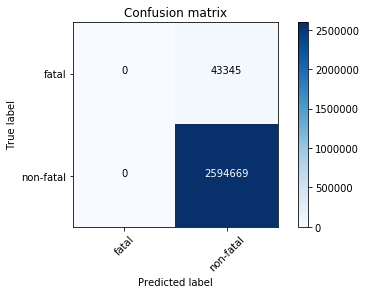

In [18]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fatal','non-fatal'],normalize= False,  title='Confusion matrix')

As we see above the Logistic Regression model although statistically predicts extremely well the fatality of a collision, but since almost if not all of the time, its predicts the same result (non-fatal), we conclude that IT NOT USEFUL TO PREDICTS FATALITY BASED ON THE VEHICLE'S YEAR MODEL, AND THUS THIS MACHINE LEARNING MODEL IS SUBPAR AND NOT RELIABLE. 

This shows that our hypothesis is wrong, that is, there are no relations between year model and collison fatality. So the next question is, can we do better? 


___

<h2>Prediction from environment conditions:

*  <h3>&nbsp; Data preprocessing:

In [19]:
# Querying necessary data: Weather condition, Road surface, Road alignment, Traffic control, and severity
env_df = df[['C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'C_SEV']]
env_df.head()

,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,C_SEV
0,UU,1,5,3,03,2
1,UU,1,5,3,03,2
2,UU,1,5,3,03,2
3,UU,5,3,6,18,2
4,UU,5,3,6,18,2


In [20]:
env_df.shape

(5860405, 6)

In [21]:
# Dropping non-applicable data
for x in ['C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF']:
    env_df = env_df[~env_df[x].isin(['U', 'X', 'Q', 'UU', 'XX', 'QQ'])]

In [22]:
env_df.shape

(4839324, 6)

We lose a significant amount of data due to non-applicable cases, hence, we have to adjust train/test split accordingly.

In [23]:
y = env_df[['C_SEV']].to_numpy()
np.unique(y_test, return_counts=True)

(array([1, 2]), array([  43345, 2594669]))

In [24]:
X = env_df[['C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF']].to_numpy()
X[0:5]

array([['01', '1', '1', '1', '06'],
       ['01', '1', '1', '1', '06'],
       ['02', '1', '1', '1', '01'],
       ['02', '1', '1', '1', '01'],
       ['02', '1', '1', '1', '01']], dtype=object)

*  <h3>&nbsp; Train/test split:

In [25]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=73125)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2903594, 5) (2903594, 1)
Test set: (1935730, 5) (1935730, 1)


*  <h3>&nbsp; Modelling:

In [26]:
from sklearn.tree import DecisionTreeClassifier
fatalityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
fatalityTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
fatalityTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
predTree = fatalityTree.predict(X_test)

In [29]:
np.unique(predTree, return_counts=True)

(array([1, 2]), array([    282, 1935448]))

*  <h3>&nbsp; Evaluation:

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9831634577136275


Confusion matrix, without normalization
[[    161   32470]
 [    121 1902978]]


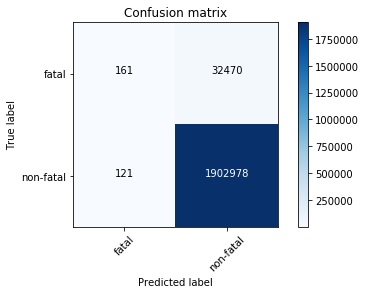

In [31]:
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fatal','non-fatal'],normalize= False,  title='Confusion matrix')

The target here is to create a model that produce least false-negative cases (that is, giving non-fatal predictions to fatal cases). We will iterate through
different seeds (different random state) to find the optimal model

*  <h3>&nbsp; Stochastic Boosting:

 Stochastic Boosting is the process of generating the models iteratively with random initial condition to find optimal model.

In [32]:
# from random import seed
# from random import randint
# seed(1343435)
# keygen = []
# for _ in range(10):
#     value = randint(10000, 100000)
#     keygen.append(value)
    
# keygen

In [33]:
best_list = dict()
keygen = [99910, 44049, 13439, 33292, 24075, 91352, 39343, 32651, 17904, 54499, 39555, 88311, 53264, 
          93519, 63298, 60972, 26663, 86799, 60472, 79776]

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=keygen[i])
    fatalityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
    fatalityTree.fit(X_train, y_train)
    predTree = fatalityTree.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
    best_list[i] = cnf_matrix[0][1]
    print("sucessfully ran ", i + 1, " time(s)")

sucessfully ran  1  time(s)
sucessfully ran  2  time(s)
sucessfully ran  3  time(s)
sucessfully ran  4  time(s)
sucessfully ran  5  time(s)
sucessfully ran  6  time(s)
sucessfully ran  7  time(s)
sucessfully ran  8  time(s)
sucessfully ran  9  time(s)
sucessfully ran  10  time(s)
sucessfully ran  11  time(s)
sucessfully ran  12  time(s)
sucessfully ran  13  time(s)
sucessfully ran  14  time(s)
sucessfully ran  15  time(s)
sucessfully ran  16  time(s)
sucessfully ran  17  time(s)
sucessfully ran  18  time(s)
sucessfully ran  19  time(s)
sucessfully ran  20  time(s)


In [36]:
# Getting the best seed
import operator
min(best_list.items(), key=operator.itemgetter(1))[0]
best_list[15]

19993

In [38]:
# Recreating the model
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=19993)
fatalityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
fatalityTree.fit(X_train, y_train)
predTree = fatalityTree.predict(X_test)

DecisionTrees's Accuracy:  0.9831530188927213
Confusion matrix, without normalization
[[    109   20320]
 [     62 1189340]]


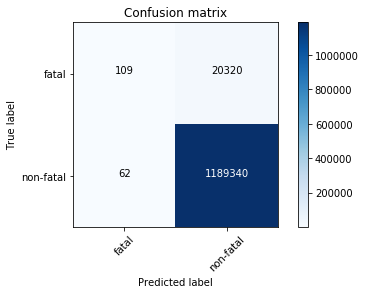

In [39]:
# Re-evaluating model
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fatal','non-fatal'],normalize= False,  title='Confusion matrix')

___

<h2>Discussion

In this report we predict fatality of vehicle accidents with the help of machine learning. We started with hypotheses and using machine learning to find
pattern/ proving those hypotheses. Sometimes, contrary to common beliefs, correlations between data that seems to have causal effects fail to show them
in a large enough data set.

In this report, we chose, hypothesized, and proved the correlation between fatality and environment conditions. We chose this data set since it can give a person the choice to operate vehicle in such condition or not, almost as a recommender algorithm. Exploring correlations between other data group, such as personal data elements (sex, age,...) may give insight to many other applications, and are possible future goals to explore from this data set.

The result of this model is a conscientious decision tree (in other word: "better safe than sorry"). The aim was to minimize false-negative predictions. The aforemention model achieved that through Stochastic Boosting. 

Lastly, here is the visualization of the tree.

In [66]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!pip install pydotplus

In [44]:
!pip install graphviz

In [67]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.190515 to fit



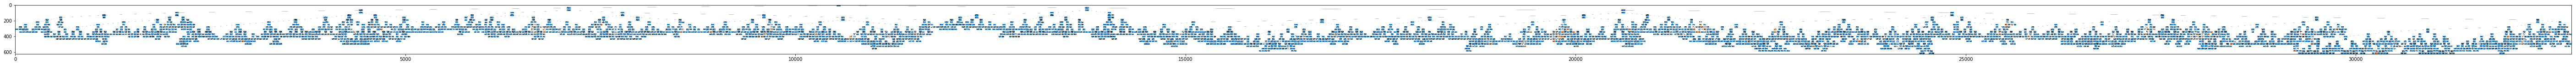

In [65]:
dot_data = StringIO()
filename = "fatalityTree.png"
featureNames = env_df.columns[0:5]
targetNames = env_df['C_SEV'].unique().tolist()
out=tree.export_graphviz(fatalityTree, feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_train)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

___

<h3>Author: <a href="https://www.linkedin.com/in/danh-h-nguyen/">Danh Nguyen</a></h3>

My name is Danh Nguyen and I am a Computer Engineering student at the University of Alberta. My training is a combination of Electrical Engineering and  Computer Science. My area of interest revolves around Algorithm, and most recently, Data Science.


<p>Copyright &copy; 2020 Danh Nguyen. This notebook and its content are released under the terms of the <a href="https://github.com/danny-cpp/Coursera_Project/blob/master/LICENSE">MIT License<a>
